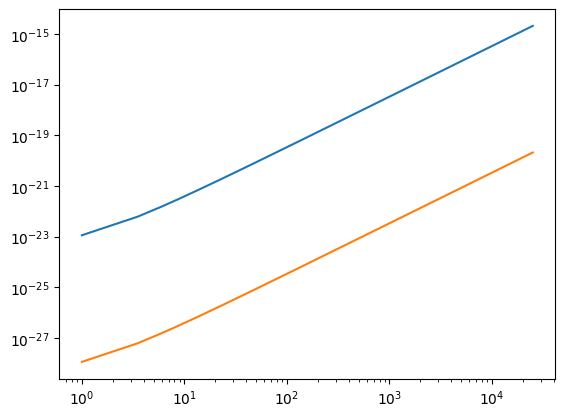

In [72]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

G = 6.67430e-11
M = np.linspace(1e14, 1e19, 2)
b = np.linspace(1, 25001, 10000)
def angle(b, m, c = 299793458, g = G):
    return 4 * g * m / (np.power(c, 2) * b)
total_weight = quad(angle, b[0], b[-1], args = (M[1]), limit = 1000000000)[0] - quad(angle, b[0], b[-1], args = (M[0]), limit = 1000000000)[0]
# a = []
# for m in M:
#     a.append(angle(m, b[1:]))
#     plt.xlabel("impact parameter, b (m)")
#     plt.ylabel("angle of deflection, a (rad)")
#     plt.axhline(1e-12, c = "black")
#     plt.xscale("log")
#     plt.plot(b[1:], a[-1])
# plt.fill_between(b[1:], a[0], a[1], alpha = 0.1)
# plt.show()

def counts(dist, m, GeV = 0.3, J = 1.609e-19, c = 299792458, cm_to_m_cubed = 1e-2, PBH_v = 200000, yr = 60 * 60 * 24 * 365):
    return ((angle(dist, M[1]) - angle(dist, M[0])) / total_weight) * (GeV * J * 1e9) * PBH_v * np.power(dist + 0.5, 3) * yr / (np.power(cm_to_m_cubed, 3) * np.power(c, 2) * m)
c = np.array([])
for d in b:
    c = np.append(c, counts(d, M[0]))
plt.loglog(b, c)
c = np.array([])
for d in b:
    c = np.append(c, counts(d, M[1]))
plt.loglog(b, c)